In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import cv2 # Added for image equalozation
from math import *
import imageio
import os
import pandas as pd
import copy

folder = '/home/matteo/PIV'
save = 1 # Save images at the end of postProcessing in Images/ImagesCorrected

In [2]:
# Camera
resolution = (992,1004) #pixel
physical_window = (45,45) # m
pixel_depth = 8 # bit
dynamic_range = 2**pixel_depth # levels
scaling_factor = 1/(np.mean(physical_window)/np.mean(resolution)) # m/pixel

In [3]:
# Load saveVectorField functiopon
%run -i '/home/matteo/PIV/Scripts/saveVectorField'
%run -i '/home/matteo/PIV/Scripts/flash_mask'

In [4]:
# Generate strings for the images
numbers = ["{0:03}".format(i) for i in range(2,101)]

In [5]:
# Initialize u and v
x,y,u,v,snr,mask = saveVectorField('001', save=save)
u, v = u.flatten(), v.flatten()

Processing image number:001


/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 0 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
<ipython-input-5-f9a713caf978>:2: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  x,y,u,v,snr,mask = saveVectorField('001', save=save)
/home/matteo/.local/lib/python3.8/site-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


In [6]:
# Save vector field for all the images

for i in numbers:
    _, _, uv, vv, _, _ = saveVectorField(i, save=save)
    uv = uv.flatten()
    vv = vv.flatten()
    u = np.c_[u,uv]
    v = np.c_[v,vv]

Processing image number:002


/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 0 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
<ipython-input-6-c643924f6768>:4: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  _, _, uv, vv, _, _ = saveVectorField(i, save=save)


Processing image number:003
Processing image number:004
Processing image number:005
Processing image number:006


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 5 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 5 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:007
Processing image number:008


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 7 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 7 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:009
Processing image number:010
Processing image number:011


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 1 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 1 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:012
Processing image number:013


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 2 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 2 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:014
Processing image number:015
Processing image number:016
Processing image number:017
Processing image number:018
Processing image number:019
Processing image number:020
Processing image number:021
Processing image number:022
Processing image number:023
Processing image number:024
Processing image number:025
Processing image number:026


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 3 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 3 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:027
Processing image number:028
Processing image number:029
Processing image number:030
Processing image number:031
Processing image number:032
Processing image number:033
Processing image number:034
Processing image number:035
Processing image number:036
Processing image number:037
Processing image number:038
Processing image number:039
Processing image number:040
Processing image number:041
Processing image number:042


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 4 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 4 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:043
Processing image number:044
Processing image number:045


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 8 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 8 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:046
Processing image number:047
Processing image number:048
Processing image number:049
Processing image number:050
Processing image number:051
Processing image number:052


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 14 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 14 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:053
Processing image number:054
Processing image number:055
Processing image number:056
Processing image number:057
Processing image number:058
Processing image number:059
Processing image number:060
Processing image number:061
Processing image number:062


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 9 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 9 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:063


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 6 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 6 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:064
Processing image number:065
Processing image number:066
Processing image number:067
Processing image number:068
Processing image number:069


/home/matteo/PIV/Scripts/saveVectorField.py:47: UserWarning: 10 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')
/home/matteo/PIV/Scripts/saveVectorField.py:50: UserWarning: 10 flashed regions in frame a have been replaced with a random noise
  warnings.warn(str(number_a)+ ' flashed regions in frame a have been replaced with a random noise')


Processing image number:070
Processing image number:071
Processing image number:072
Processing image number:073
Processing image number:074
Processing image number:075
Processing image number:076
Processing image number:077
Processing image number:078
Processing image number:079
Processing image number:080
Processing image number:081
Processing image number:082
Processing image number:083
Processing image number:084
Processing image number:085
Processing image number:086
Processing image number:087
Processing image number:088
Processing image number:089
Processing image number:090
Processing image number:091
Processing image number:092
Processing image number:093
Processing image number:094
Processing image number:095
Processing image number:096
Processing image number:097
Processing image number:098
Processing image number:099
Processing image number:100


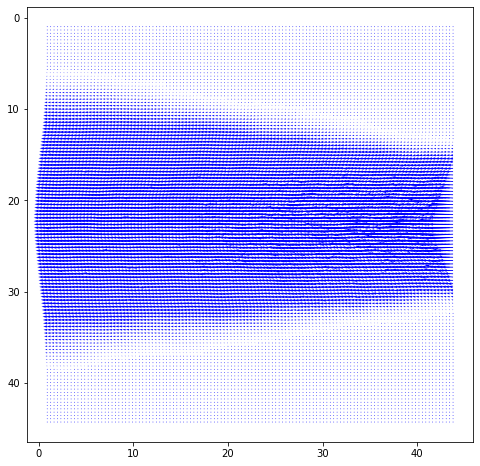

In [7]:
# Calculate the mean velocity
umean, vmean = np.mean(u,axis=1), np.mean(v,axis=1)
umean, vmean = umean.reshape(mask.shape), vmean.reshape(mask.shape)

# Initialize mask and snr fields
mask = np.zeros(mask.shape, dtype=bool)
snr = np.zeros(mask.shape)

#save in the simple ASCII table format
tools.save(x, y, umean, vmean, snr, mask, folder + '/Vector_field/exp1_' + 'meanField.txt' )

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field( folder + '/Vector_field/exp1_' + 'meanField.txt' , 
                           ax=ax, scaling_factor=scaling_factor, 
                           scale= 80, # scale defines here the arrow length
                           width= 0.002, # width is the thickness of the arrow
                           on_img=False, # overlay on the image
                           image_name= 'None');


In [8]:
# Calculate rms velocity field
#urms, vrms = np.std(u,axis=1), np.std(v,axis=1)
urms, vrms = urms.reshape(mask.shape), vrms.reshape(mask.shape)

#save in the simple ASCII table format
tools.save(x, y, urms, vrms, snr, mask, folder + '/Vector_field/exp1_' + 'rmsField.txt' )

# Plot
X, Y = np.meshgrid(x[0], y.transpose()[0]) 

ax1 = plt.subplot(1,2,1)
ax1.pcolormesh(X,Y,urms)
ax1.axis('equal')
ax2 = plt.subplot(1,2,2)
ax2.axis('equal')
ax2.pcolormesh(X,Y,vrms)


NameError: name 'urms' is not defined